# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000592,AC00363,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000315,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
numerical_cols.corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.024428,0.004782,-0.007397,-0.026310
CustomerAge,-0.024428,1.000000,-0.009852,0.007876,0.321161
TransactionDuration,0.004782,-0.009852,1.000000,0.030076,0.006859
LoginAttempts,-0.007397,0.007876,0.030076,1.000000,0.009088
AccountBalance,-0.026310,0.321161,0.006859,0.009088,1.000000


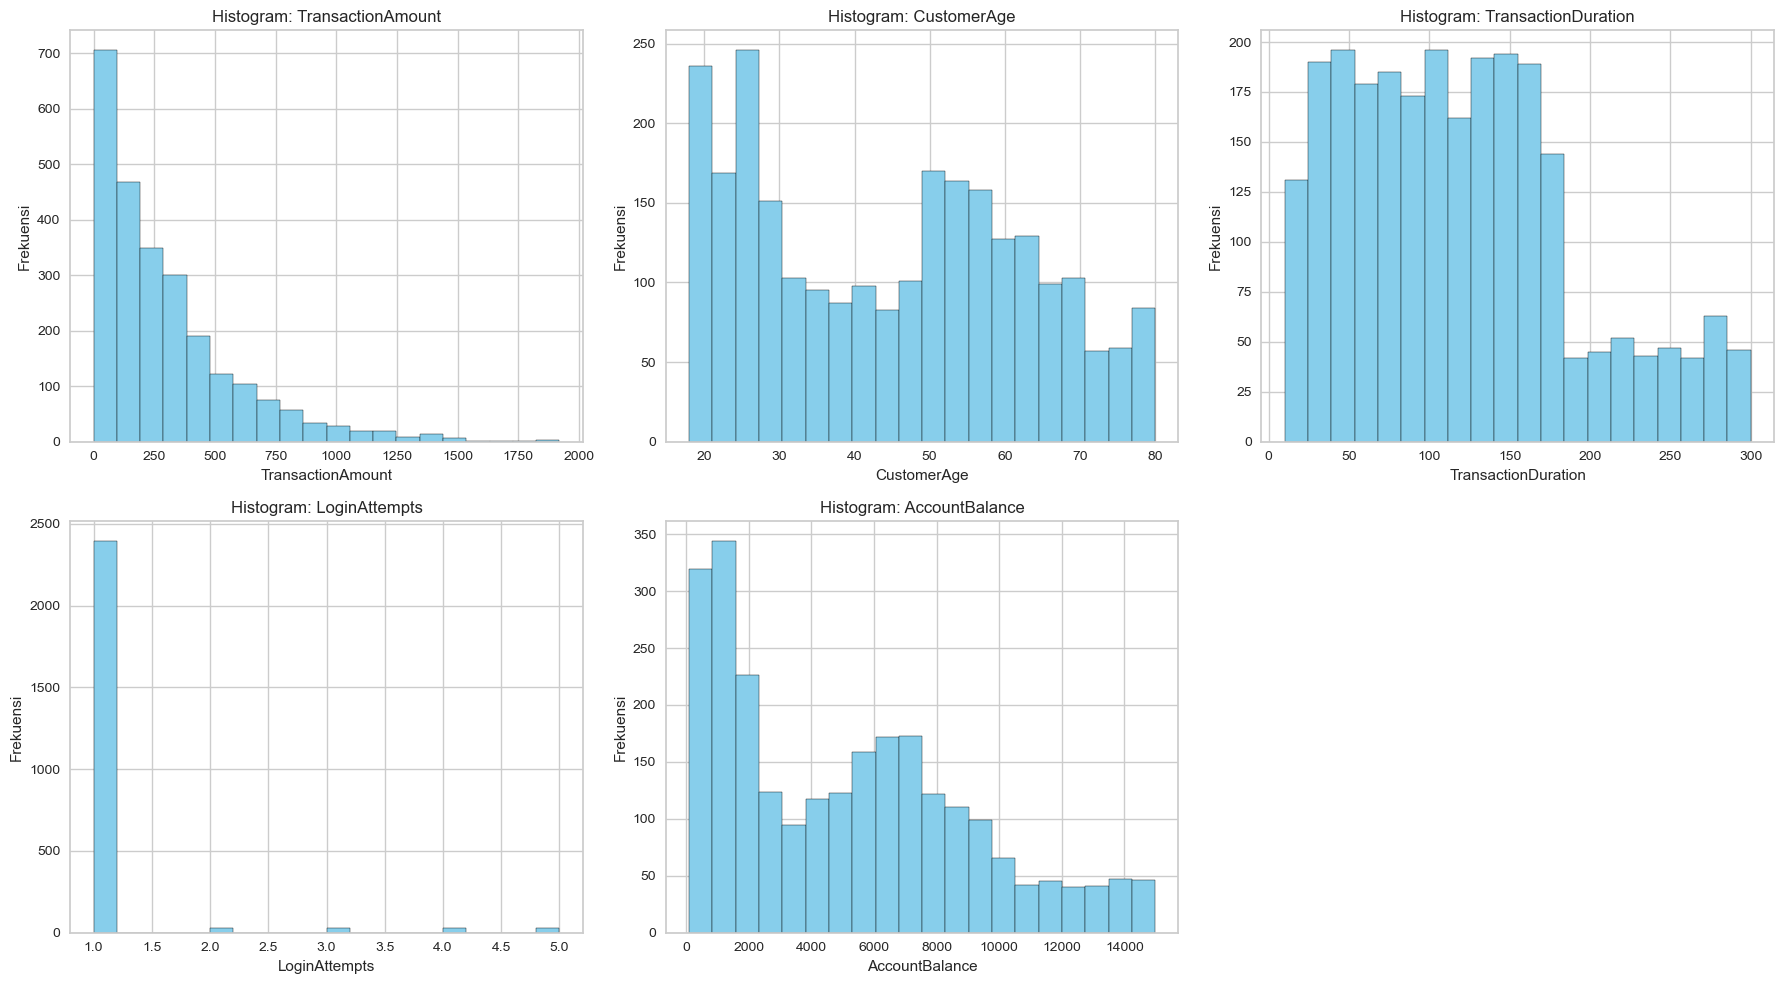

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

num_cols = len(numerical_cols.columns)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(18, 5 * rows))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(rows, cols_per_row, i + 1)
    numerical_cols[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

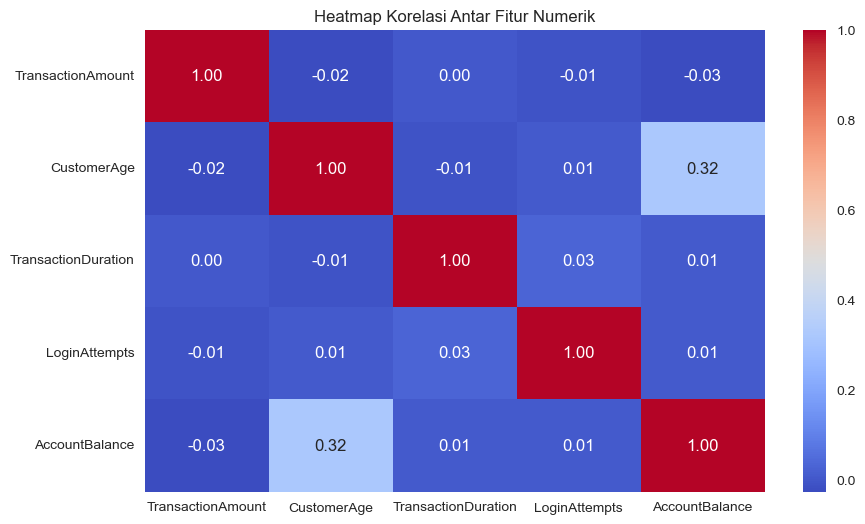

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

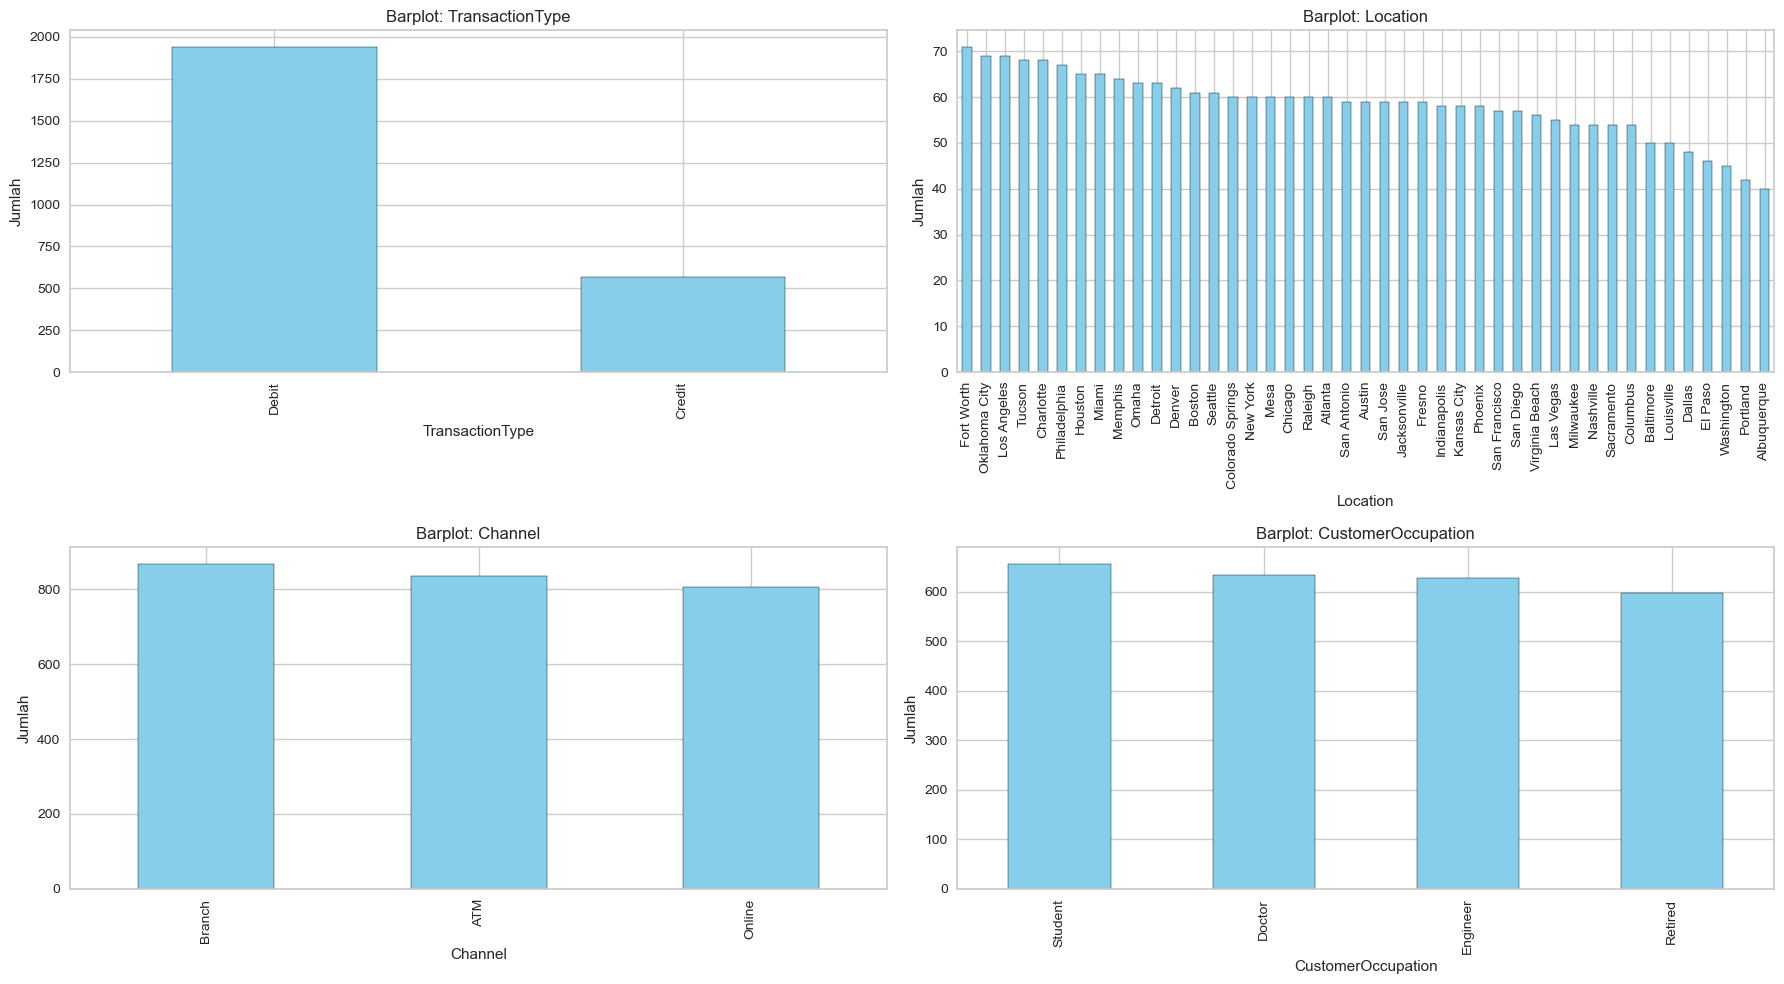

In [9]:
cat_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))
for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Barplot: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

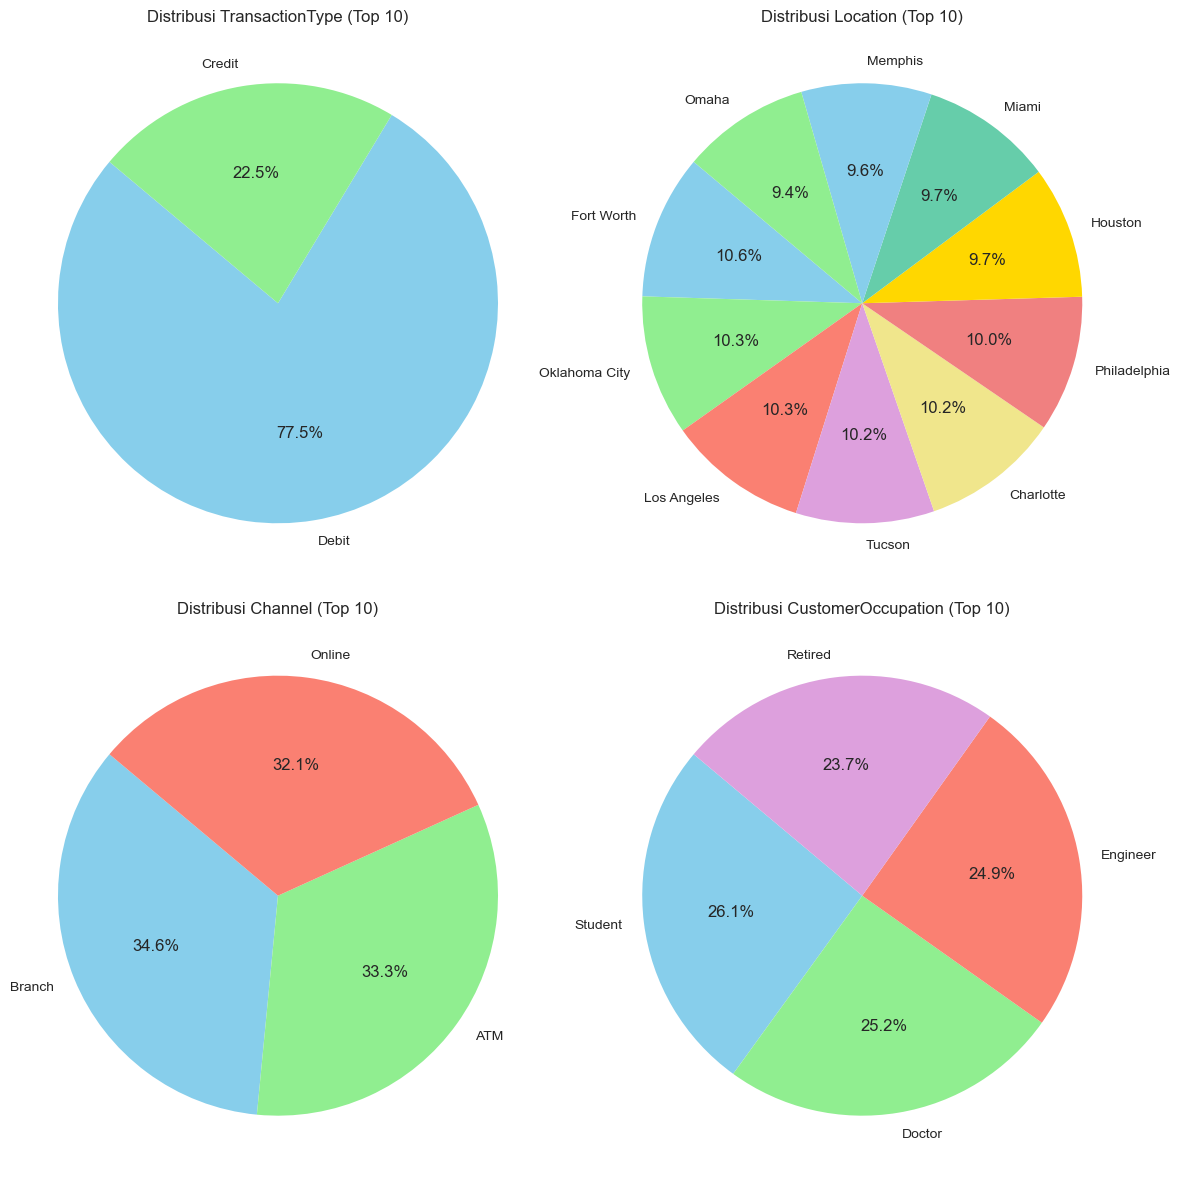

In [10]:
custom_colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'khaki', 
                 'lightcoral', 'gold', 'mediumaquamarine']

cols_per_row = 2
rows = (len(cat_cols) + 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts().head(10)
    colors = (custom_colors * ((len(counts) // len(custom_colors)) + 1))[:len(counts)]
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f'Distribusi {col} (Top 10)')
    axes[i].axis('equal')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

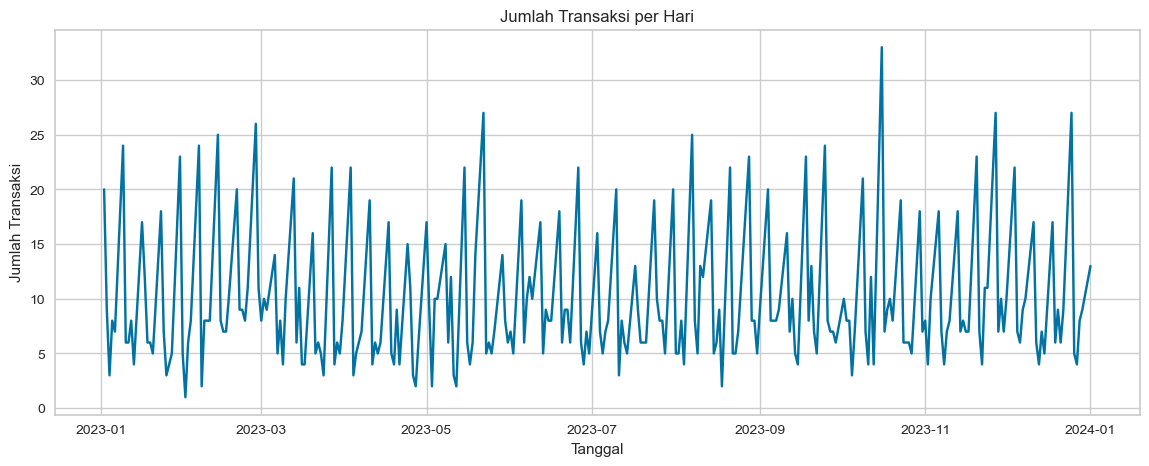

In [11]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
daily_tx = df.groupby(df['TransactionDate'].dt.date)['TransactionID'].count()

plt.figure(figsize=(14, 5))
daily_tx.plot()
plt.title('Jumlah Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

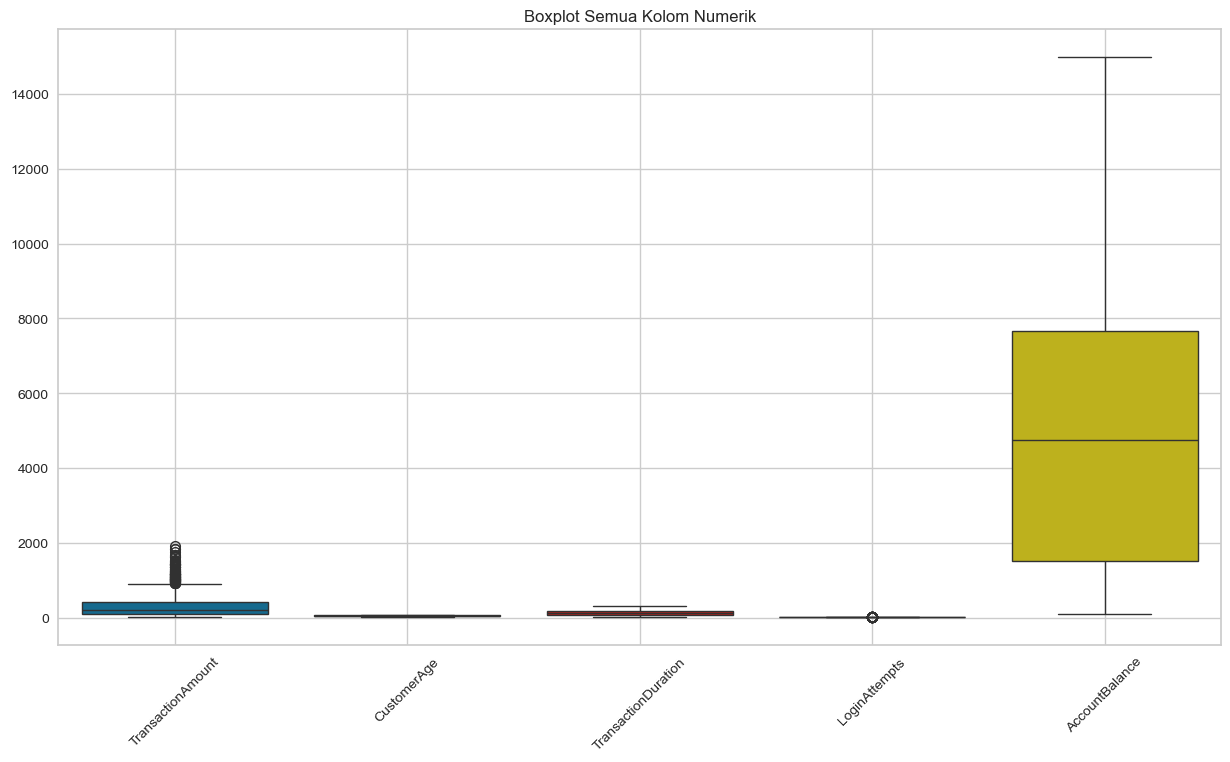

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=numerical_cols)
plt.title('Boxplot Semua Kolom Numerik')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [13]:
# Mengecek dataset menggunakan isnull().sum()
print("Missing Values per Kolom:\n", df.isnull().sum())

Missing Values per Kolom:
 TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [14]:
# Mengecek dataset menggunakan duplicated().sum()
print("Jumlah Data Duplikat:", df.duplicated().sum())

Jumlah Data Duplikat: 21


In [15]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Setelah Scaling:")
print(df.head())

Setelah Scaling:
  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128           0.007207 2023-04-11 16:29:14   
1      TX000002   AC00455           0.195940 2023-06-27 16:44:19   
2      TX000003   AC00019           0.065680 2023-07-10 18:16:08   
3      TX000004   AC00070           0.096016 2023-05-05 16:32:11   
4      TX000005   AC00411           0.006874 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710             Doctor           

In [16]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
drop_cols = [col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()]
df = df.drop(columns=drop_cols)

In [17]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

print("Setelah Encoding:")
print(df.head())

Setelah Encoding:
   TransactionAmount     TransactionDate  TransactionType  Location  Channel  \
0           0.007207 2023-04-11 16:29:14                1        36        0   
1           0.195940 2023-06-27 16:44:19                1        15        0   
2           0.065680 2023-07-10 18:16:08                1        23        2   
3           0.096016 2023-05-05 16:32:11                1        33        2   
4           0.006874 2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                   0             0.244828            0.0   
1     0.806452                   0             0.451724            0.0   
2     0.016129                   3             0.158621            0.0   
3     0.129032                   3             0.051724            0.0   
4          NaN                   3             0.648276            0.0   

   AccountBalance  PreviousTransactionDate  
0        0.

In [18]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [19]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

print("Setelah menangani missing values:")
print(df.isnull().sum())

Setelah menangani missing values:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [20]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

print("\nSetelah menghapus duplikat:")
print(f"Jumlah baris data: {df.shape[0]}")


Setelah menghapus duplikat:
Jumlah baris data: 2514


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [21]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Menggunakan IQR method
def handle_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Jumlah outlier pada '{col}':", outliers.shape[0])

    if outliers.shape[0] / df.shape[0] < 0.05:
        df.drop(outliers.index, inplace=True)
    else:
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                           df[col].median(), df[col])

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    handle_outliers_iqr(col)

print("\nSetelah menangani outlier:")
print(df[numeric_cols].describe())

Jumlah outlier pada 'TransactionAmount': 113
Jumlah outlier pada 'CustomerAge': 0
Jumlah outlier pada 'TransactionDuration': 0
Jumlah outlier pada 'LoginAttempts': 115
Jumlah outlier pada 'AccountBalance': 0

Setelah menangani outlier:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2286.000000  2286.000000          2286.000000         2286.0   
mean            0.132748     0.429677             0.375470            0.0   
std             0.112915     0.284662             0.239815            0.0   
min             0.000000     0.000000             0.000000            0.0   
25%             0.040790     0.145161             0.182759            0.0   
50%             0.104101     0.435484             0.351724            0.0   
75%             0.193979     0.661290             0.520690            0.0   
max             0.467223     1.000000             1.000000            0.0   

       AccountBalance  
count     2286.000000  
mean         0.337391 

In [22]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
if 'TransactionAmount' in df.columns:
    bins_amount = [0, 0.2, 0.5, 1.0]
    labels_amt = ['low', 'medium', 'high']

    df['TransactionAmount_Binned'] = pd.cut(df['TransactionAmount'],
                                            bins=bins_amount,
                                            labels=labels_amt,
                                            include_lowest=True)

    le_amt = LabelEncoder()
    df['TransactionAmount_Binned_Encoded'] = le_amt.fit_transform(df['TransactionAmount_Binned'])

if 'CustomerAge' in df.columns:
    bins_age = [0, 0.33, 0.66, 1.0]
    labels_age = ['young', 'adult', 'senior']

    df['CustomerAge_Binned'] = pd.cut(df['CustomerAge'],
                                      bins=bins_age,
                                      labels=labels_age,
                                      include_lowest=True)

    le_age = LabelEncoder()
    df['CustomerAge_Binned_Encoded'] = le_age.fit_transform(df['CustomerAge_Binned'])

print("\nHasil binning dan encoding:")
print(df[['TransactionAmount', 'TransactionAmount_Binned', 'TransactionAmount_Binned_Encoded',
          'CustomerAge', 'CustomerAge_Binned', 'CustomerAge_Binned_Encoded']].head())


Hasil binning dan encoding:
   TransactionAmount TransactionAmount_Binned  \
0           0.007207                      low   
1           0.195940                      low   
2           0.065680                      low   
3           0.096016                      low   
4           0.006874                      low   

   TransactionAmount_Binned_Encoded  CustomerAge CustomerAge_Binned  \
0                                 0     0.838710             senior   
1                                 0     0.806452             senior   
2                                 0     0.016129              young   
3                                 0     0.129032              young   
4                                 0     0.435484              adult   

   CustomerAge_Binned_Encoded  
0                           1  
1                           1  
2                           2  
3                           2  
4                           0  


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [23]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_Binned_Encoded,CustomerAge_Binned_Encoded
count,2286.000000,2286,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2286.0,2286.000000,2286.000000,2286.000000,2286.000000
mean,0.132748,2023-07-03 08:08:30.772090880,0.788714,21.354768,1.010499,0.429677,1.530621,0.375470,0.0,0.337391,180.723972,0.238408,1.085739
min,0.000000,2023-01-02 16:00:06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.040790,2023-03-29 17:53:31.249999872,1.000000,11.000000,0.000000,0.145161,1.000000,0.182759,0.0,0.095703,92.000000,0.000000,0.000000
50%,0.104101,2023-07-04 18:05:17.500000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.311416,181.000000,0.000000,1.000000
75%,0.193979,2023-10-04 17:09:15.750000128,1.000000,32.000000,2.000000,0.661290,3.000000,0.520690,0.0,0.505373,271.000000,0.000000,2.000000
max,0.467223,2024-01-01 18:21:50,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,1.000000,2.000000
std,0.112915,NaN,0.439290,12.429289,0.827786,0.284662,1.147990,0.239815,0.0,0.259560,103.739332,0.426203,0.858780


In [24]:
df.columns

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TransactionAmount_Binned', 'TransactionAmount_Binned_Encoded',
       'CustomerAge_Binned', 'CustomerAge_Binned_Encoded'],
      dtype='object')

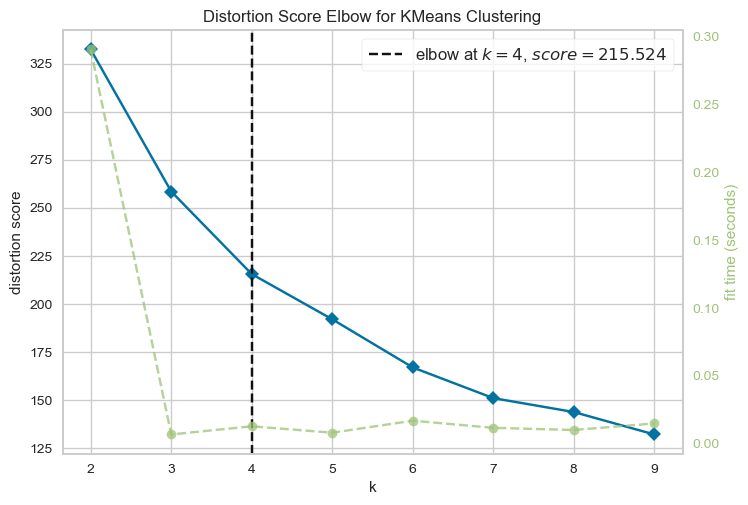

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
scaled_data = df[num_cols].values

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()

In [26]:
# Menggunakan algoritma K-Means Clustering
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

Jalankan cell code ini untuk menyimpan model kamu.

In [27]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [28]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3043


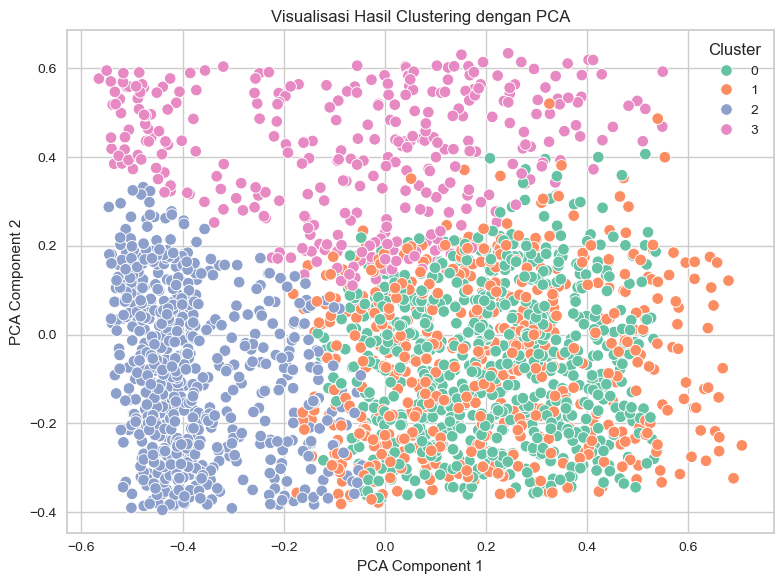

In [29]:
# Membuat visualisasi hasil clustering
pca_2d = PCA(n_components=2)
pca_result = pca_2d.fit_transform(scaled_data)

df_plot = pd.DataFrame({
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'Cluster': df['Cluster']
})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('Visualisasi Hasil Clustering dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [30]:
# Membangun model menggunakan PCA.
pca_model = PCA(n_components=2)
pca_model.fit(scaled_data)

PCA(n_components=2)

In [31]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [32]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

cluster_summary = df.groupby('Cluster')[numeric_cols].agg(['mean', 'min', 'max'])

pd.set_option('display.float_format', '{:.3f}'.format)
print("Analisis Deskriptif per Cluster:")
print(cluster_summary)

Analisis Deskriptif per Cluster:
        TransactionAmount             CustomerAge              \
                     mean   min   max        mean   min   max   
Cluster                                                         
0                   0.132 0.000 0.463       0.720 0.403 1.000   
1                   0.134 0.000 0.467       0.427 0.000 0.823   
2                   0.133 0.000 0.459       0.130 0.000 0.468   
3                   0.132 0.000 0.464       0.407 0.000 1.000   

        TransactionDuration             LoginAttempts              \
                       mean   min   max          mean   min   max   
Cluster                                                             
0                     0.302 0.000 0.759         0.000 0.000 0.000   
1                     0.310 0.000 0.883         0.000 0.000 0.000   
2                     0.305 0.000 0.731         0.000 0.000 0.000   
3                     0.780 0.455 1.000         0.000 0.000 0.000   

        AccountBalance     

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah Usia Tua, Saldo Rendah, Durasi Transaksi Singkat)**:
   - **Rata-rata (mean) TransactionAmount:** Sebelum inverse (0.132)
   - **Nilai terkecil (min) TransactionAmount:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) TransactionAmount:** Sebelum inverse (0.463)
   - **Rata-rata (mean) CustomerAge:** Sebelum inverse (0.720)
   - **Nilai terkecil (min) CustomerAge:** Sebelum inverse (0.403)
   - **Nilai terbesar (max) CustomerAge:** Sebelum inverse (1.000)
   - **Rata-rata (mean) TransactionDuration:** Sebelum inverse (0.302)
   - **Nilai terkecil (min) TransactionDuration:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) TransactionDuration:** Sebelum inverse (0.759)
   - **Rata-rata (mean) LoginAttempts:** Sebelum inverse (0.000)
   - **Nilai terkecil (min) LoginAttempts:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) LoginAttempts:** Sebelum inverse (0.000)
   - **Rata-rata (mean) AccountBalance:** Sebelum inverse (0.299)
   - **Nilai terkecil (min) AccountBalance:** Sebelum inverse (0.001)
   - **Nilai terbesar (max) AccountBalance:** Sebelum inverse (0.667)
   - **Analisis:** Cluster ini mencakup nasabah dengan usia relatif lebih tua (nilai CustomerAge tertinggi), namun memiliki saldo rekening dan jumlah transaksi yang rendah. Mereka juga melakukan transaksi dengan durasi yang cenderung singkat. Nasabah ini kemungkinan lebih berhati-hati dalam bertransaksi. Rekomendasi layanan bisa berupa produk pensiun atau tabungan berjangka.

2. **Cluster 1: (Nasabah Saldo Tinggi, Transaksi Sedang, Usia Menengah)**:
   - **Rata-rata (mean) TransactionAmount:** Sebelum inverse (0.134)
   - **Nilai terkecil (min) TransactionAmount:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) TransactionAmount:** Sebelum inverse (0.467)
   - **Rata-rata (mean) CustomerAge:** Sebelum inverse (0.427)
   - **Nilai terkecil (min) CustomerAge:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) CustomerAge:** Sebelum inverse (0.823)
   - **Rata-rata (mean) TransactionDuration:** Sebelum inverse (0.310)
   - **Nilai terkecil (min) TransactionDuration:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) TransactionDuration:** Sebelum inverse (0.883)
   - **Rata-rata (mean) LoginAttempts:** Sebelum inverse (0.000)
   - **Nilai terkecil (min) LoginAttempts:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) LoginAttempts:** Sebelum inverse (0.000)
   - **Rata-rata (mean) AccountBalance:** Sebelum inverse (0.668)
   - **Nilai terkecil (min) AccountBalance:** Sebelum inverse (0.359)
   - **Nilai terbesar (max) AccountBalance:** Sebelum inverse (1.000)
   - **Analisis:** Cluster ini terdiri dari nasabah dengan saldo rekening tertinggi di antara semua cluster, usia menengah, dan tingkat transaksi yang tidak terlalu tinggi maupun rendah. Ini bisa menjadi kelompok dengan profil stabil secara finansial. Rekomendasi layanan untuk cluster ini bisa mencakup investasi menengah risiko atau kredit dengan bunga ringan.

3. **Cluster 2: (Nasabah Muda, Saldo dan Transaksi Rendah)**:
   - **Rata-rata (mean) TransactionAmount:** Sebelum inverse (0.133)
   - **Nilai terkecil (min) TransactionAmount:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) TransactionAmount:** Sebelum inverse (0.459)
   - **Rata-rata (mean) CustomerAge:** Sebelum inverse (0.130)
   - **Nilai terkecil (min) CustomerAge:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) CustomerAge:** Sebelum inverse (0.468)
   - **Rata-rata (mean) TransactionDuration:** Sebelum inverse (0.305)
   - **Nilai terkecil (min) TransactionDuration:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) TransactionDuration:** Sebelum inverse (0.731)
   - **Rata-rata (mean) LoginAttempts:** Sebelum inverse (0.000)
   - **Nilai terkecil (min) LoginAttempts:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) LoginAttempts:** Sebelum inverse (0.000)
   - **Rata-rata (mean) AccountBalance:** Sebelum inverse (0.106)
   - **Nilai terkecil (min) AccountBalance:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) AccountBalance:** Sebelum inverse (0.467)
   - **Analisis:** Cluster ini memiliki nasabah dengan usia termuda, saldo rekening yang sangat rendah, serta jumlah transaksi kecil. Ini mengindikasikan nasabah pemula atau pelajar/mahasiswa yang baru menggunakan layanan keuangan. Rekomendasi layanan adalah program edukasi keuangan atau produk simpanan khusus untuk pemula.

5. **Cluster 3: (Nasabah Usia Menengah, Durasi Transaksi Tinggi, Saldo Sedang**:
   - **Rata-rata (mean) TransactionAmount:** Sebelum inverse (0.132)
   - **Nilai terkecil (min) TransactionAmount:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) TransactionAmount:** Sebelum inverse (0.464)
   - **Rata-rata (mean) CustomerAge:** Sebelum inverse (0.407)
   - **Nilai terkecil (min) CustomerAge:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) CustomerAge:** Sebelum inverse (1.000)
   - **Rata-rata (mean) TransactionDuration:** Sebelum inverse (0.780)
   - **Nilai terkecil (min) TransactionDuration:** Sebelum inverse (0.455)
   - **Nilai terbesar (max) TransactionDuration:** Sebelum inverse (1.000)
   - **Rata-rata (mean) LoginAttempts:** Sebelum inverse (0.000)
   - **Nilai terkecil (min) LoginAttempts:** Sebelum inverse (0.000)
   - **Nilai terbesar (max) LoginAttempts:** Sebelum inverse (0.000)
   - **Rata-rata (mean) AccountBalance:** Sebelum inverse (0.318)
   - **Nilai terkecil (min) AccountBalance:** Sebelum inverse (0.002)
   - **Nilai terbesar (max) AccountBalance:** Sebelum inverse (0.958)
   - **Analisis:** Cluster ini memiliki nasabah usia menengah, durasi transaksi tertinggi dibanding cluster lain, namun saldo tidak terlalu tinggi. Mereka mungkin adalah pengguna aktif yang memerlukan waktu lebih lama dalam melakukan transaksi seperti pembayaran atau transfer besar. Rekomendasi layanan untuk kelompok ini adalah fitur transaksi cepat atau produk digital banking premium.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [33]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [34]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [35]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.
df_inverse = df.copy()
df_inverse[num_cols] = scaler.inverse_transform(df_inverse[num_cols])

for col in cat_cols:
    if col in df_inverse.columns:
        le = label_encoders[col]
        df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

if 'TransactionAmount_Binned_Encoded' in df_inverse.columns:
    df_inverse['TransactionAmount_Binned'] = le_amt.inverse_transform(
        df_inverse['TransactionAmount_Binned_Encoded'].astype(int)
    )

if 'CustomerAge_Binned_Encoded' in df_inverse.columns:
    df_inverse['CustomerAge_Binned'] = le_age.inverse_transform(
        df_inverse['CustomerAge_Binned_Encoded'].astype(int)
    )

In [36]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
numeric_cols = df_inverse.select_dtypes(include=['float64', 'int64']).columns.tolist()

cluster_labels = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2',
    3: 'Cluster 3'
}

cluster_summary = df_inverse.groupby('Target')[numeric_cols].agg(['mean', 'min', 'max'])

cluster_summary.index = cluster_summary.index.map(cluster_labels)

pd.set_option('display.float_format', '{:.3f}'.format)
print("Analisis Deskriptif Numerik per Cluster:")
print(cluster_summary)

categorical_cols = df_inverse.select_dtypes(include=['object', 'category']).columns.tolist()
desc_categorical = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode().iloc[0])

desc_categorical.index = desc_categorical.index.map(cluster_labels)

print("\nDeskriptif Kategorikal (mode) per Cluster:")
print(desc_categorical)

Analisis Deskriptif Numerik per Cluster:
          TransactionAmount               CustomerAge                \
                       mean   min     max        mean    min    max   
Target                                                                
Cluster 0           253.298 0.840 888.570      62.654 43.000 80.000   
Cluster 1           257.105 0.320 896.790      44.449 18.000 69.000   
Cluster 2           255.803 0.260 881.320      26.048 18.000 47.000   
Cluster 3           253.389 1.210 890.240      43.216 18.000 80.000   

          TransactionDuration                 LoginAttempts              \
                         mean     min     max          mean   min   max   
Target                                                                    
Cluster 0              97.527  10.000 230.000         1.000 1.000 1.000   
Cluster 1              99.856  10.000 266.000         1.000 1.000 1.000   
Cluster 2              98.431  10.000 222.000         1.000 1.000 1.000   
Cluster 3  

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah Usia Tua, Saldo Rendah, Durasi Transaksi Singkat)**:
   - **Rata-rata (mean) TransactionAmount:** Sebelum inverse (0.132) Setelah inverse (253.298)
   - **Nilai terkecil (min) TransactionAmount:** Sebelum inverse (0.000) Setelah inverse (0.840)
   - **Nilai terbesar (max) TransactionAmount:** Sebelum inverse (0.463) Setelah inverse (888.570)
   - **Rata-rata (mean) CustomerAge:** Sebelum inverse (0.720) Setelah inverse (62.654)
   - **Nilai terkecil (min) CustomerAge:** Sebelum inverse (0.403) Setelah inverse (43.000)
   - **Nilai terbesar (max) CustomerAge:** Sebelum inverse (1.000) Setelah inverse (80.000)
   - **Rata-rata (mean) TransactionDuration:** Sebelum inverse (0.302) Setelah inverse (97.527)
   - **Nilai terkecil (min) TransactionDuration:** Sebelum inverse (0.000) Setelah inverse (10.000)
   - **Nilai terbesar (max) TransactionDuration:** Sebelum inverse (0.759) Setelah inverse (230.000)
   - **Rata-rata (mean) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Nilai terkecil (min) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Nilai terbesar (max) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Rata-rata (mean) AccountBalance:** Sebelum inverse (0.299) Setelah inverse (4546.486)
   - **Nilai terkecil (min) AccountBalance:** Sebelum inverse (0.001) Setelah inverse (120.890)
   - **Nilai terbesar (max) AccountBalance:** Sebelum inverse (0.667) Setelah inverse (10017.110)
   - **Nilai modus (mode) TransactionType:** Debit
   - **Nilai modus (mode) Location:** Charlotte
   - **Nilai modus (mode) Channel:** ATM
   - **Nilai modus (mode) CustomerOccupation:** Retired
   - **Nilai modus (mode) PreviousTransactionDate:** 2024-11-04 08:07:59
   - **Nilai modus (mode) TransactionAmount_Binned:** low
   - **Nilai modus (mode) CustomerAge_Binned:** senior
   - **Analisis:** Cluster ini mencakup nasabah dengan usia relatif lebih tua (nilai CustomerAge tertinggi), namun memiliki saldo rekening dan jumlah transaksi yang rendah. Mereka juga melakukan transaksi dengan durasi yang cenderung singkat. Nasabah ini kemungkinan lebih berhati-hati dalam bertransaksi. Rekomendasi layanan bisa berupa produk pensiun atau tabungan berjangka. <br><br>

2. **Cluster 1: (Nasabah Saldo Tinggi, Transaksi Sedang, Usia Menengah)**:
   - **Rata-rata (mean) TransactionAmount:** Sebelum inverse (0.134) Setelah inverse (257.105)
   - **Nilai terkecil (min) TransactionAmount:** Sebelum inverse (0.000) Setelah inverse (0.320)
   - **Nilai terbesar (max) TransactionAmount:** Sebelum inverse (0.467) Setelah inverse (896.790)
   - **Rata-rata (mean) CustomerAge:** Sebelum inverse (0.427) Setelah inverse (44.449)
   - **Nilai terkecil (min) CustomerAge:** Sebelum inverse (0.000) Setelah inverse (18.000)
   - **Nilai terbesar (max) CustomerAge:** Sebelum inverse (0.823) Setelah inverse (69.000)
   - **Rata-rata (mean) TransactionDuration:** Sebelum inverse (0.310) Setelah inverse (99.856)
   - **Nilai terkecil (min) TransactionDuration:** Sebelum inverse (0.000) Setelah inverse (10.000)
   - **Nilai terbesar (max) TransactionDuration:** Sebelum inverse (0.883) Setelah inverse (266.000)
   - **Rata-rata (mean) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Nilai terkecil (min) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Nilai terbesar (max) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Rata-rata (mean) AccountBalance:** Sebelum inverse (0.668) Setelah inverse (10037.150)
   - **Nilai terkecil (min) AccountBalance:** Sebelum inverse (0.359) Setelah inverse (5434.640)
   - **Nilai terbesar (max) AccountBalance:** Sebelum inverse (1.000) Setelah inverse (14977.990)
   - **Nilai modus (mode) TransactionType:** Debit
   - **Nilai modus (mode) Location:** Fort Worth
   - **Nilai modus (mode) Channel:** Branch
   - **Nilai modus (mode) CustomerOccupation:** Doctor
   - **Nilai modus (mode) PreviousTransactionDate:** 2024-11-04 08:09:17
   - **Nilai modus (mode) TransactionAmount_Binned:** low
   - **Nilai modus (mode) CustomerAge_Binned:** adult
   - **Analisis:** Cluster ini terdiri dari nasabah dengan saldo rekening tertinggi di antara semua cluster, usia menengah, dan tingkat transaksi yang tidak terlalu tinggi maupun rendah. Ini bisa menjadi kelompok dengan profil stabil secara finansial. Rekomendasi layanan untuk cluster ini bisa mencakup investasi menengah risiko atau kredit dengan bunga ringan. <br><br>

3. **Cluster 2: (Nasabah Muda, Saldo dan Transaksi Rendah)**:
   - **Rata-rata (mean) TransactionAmount:** Sebelum inverse (0.133) Setelah inverse (255.803)
   - **Nilai terkecil (min) TransactionAmount:** Sebelum inverse (0.000) Setelah inverse (0.260)
   - **Nilai terbesar (max) TransactionAmount:** Sebelum inverse (0.459) Setelah inverse (881.320)
   - **Rata-rata (mean) CustomerAge:** Sebelum inverse (0.130) Setelah inverse (26.048)
   - **Nilai terkecil (min) CustomerAge:** Sebelum inverse (0.000) Setelah inverse (18.000)
   - **Nilai terbesar (max) CustomerAge:** Sebelum inverse (0.468) Setelah inverse (47.000)
   - **Rata-rata (mean) TransactionDuration:** Sebelum inverse (0.305) Setelah inverse (98.431)
   - **Nilai terkecil (min) TransactionDuration:** Sebelum inverse (0.000) Setelah inverse (10.000)
   - **Nilai terbesar (max) TransactionDuration:** Sebelum inverse (0.731) Setelah inverse (222.000)
   - **Rata-rata (mean) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Nilai terkecil (min) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Nilai terbesar (max) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Rata-rata (mean) AccountBalance:** Sebelum inverse (0.106) Setelah inverse (1677.132)
   - **Nilai terkecil (min) AccountBalance:** Sebelum inverse (0.000) Setelah inverse (101.250)
   - **Nilai terbesar (max) AccountBalance:** Sebelum inverse (0.467) Setelah inverse (7047.040)
   - **Nilai modus (mode) TransactionType:** Debit
   - **Nilai modus (mode) Location:** Boston
   - **Nilai modus (mode) Channel:** Branch
   - **Nilai modus (mode) CustomerOccupation:** Student
   - **Nilai modus (mode) PreviousTransactionDate:** 2024-11-04 08:07:18
   - **Nilai modus (mode) TransactionAmount_Binned:** low
   - **Nilai modus (mode) CustomerAge_Binned:** young
   - **Analisis:** Cluster ini memiliki nasabah dengan usia termuda, saldo rekening yang sangat rendah, serta jumlah transaksi kecil. Ini mengindikasikan nasabah pemula atau pelajar/mahasiswa yang baru menggunakan layanan keuangan. Rekomendasi layanan adalah program edukasi keuangan atau produk simpanan khusus untuk pemula. <br><br>

4. **Cluster 3: (Nasabah Usia Menengah, Durasi Transaksi Tinggi, Saldo Sedang**:
   - **Rata-rata (mean) TransactionAmount:** Sebelum inverse (0.132) Setelah inverse (253.389)
   - **Nilai terkecil (min) TransactionAmount:** Sebelum inverse (0.000) Setelah inverse (1.210)
   - **Nilai terbesar (max) TransactionAmount:** Sebelum inverse (0.464) Setelah inverse (890.240)
   - **Rata-rata (mean) CustomerAge:** Sebelum inverse (0.407) Setelah inverse (43.216)
   - **Nilai terkecil (min) CustomerAge:** Sebelum inverse (0.000) Setelah inverse (18.000)
   - **Nilai terbesar (max) CustomerAge:** Sebelum inverse (1.000) Setelah inverse (80.000)
   - **Rata-rata (mean) TransactionDuration:** Sebelum inverse (0.780) Setelah inverse (236.299)
   - **Nilai terkecil (min) TransactionDuration:** Sebelum inverse (0.455) Setelah inverse (142.000)
   - **Nilai terbesar (max) TransactionDuration:** Sebelum inverse (1.000) Setelah inverse (300.000)
   - **Rata-rata (mean) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Nilai terkecil (min) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Nilai terbesar (max) LoginAttempts:** Sebelum inverse (0.000) Setelah inverse (1.000)
   - **Rata-rata (mean) AccountBalance:** Sebelum inverse (0.318) Setelah inverse (4830.382)
   - **Nilai terkecil (min) AccountBalance:** Sebelum inverse (0.002) Setelah inverse (135.966)
   - **Nilai terbesar (max) AccountBalance:** Sebelum inverse (0.958) Setelah inverse (14348.650)
   - **Nilai modus (mode) TransactionType:** Debit
   - **Nilai modus (mode) Location:** Atlanta
   - **Nilai modus (mode) Channel:** Branch
   - **Nilai modus (mode) CustomerOccupation:** Engineer
   - **Nilai modus (mode) PreviousTransactionDate:** 2024-11-04 08:06:33
   - **Nilai modus (mode) TransactionAmount_Binned:** low
   - **Nilai modus (mode) CustomerAge_Binned:** adult
   - **Analisis:** Cluster ini memiliki nasabah usia menengah, durasi transaksi tertinggi dibanding cluster lain, namun saldo tidak terlalu tinggi. Mereka mungkin adalah pengguna aktif yang memerlukan waktu lebih lama dalam melakukan transaksi seperti pembayaran atau transfer besar. Rekomendasi layanan untuk kelompok ini adalah fitur transaksi cepat atau produk digital banking premium.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [37]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse.columns

Index(['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'TransactionAmount_Binned', 'TransactionAmount_Binned_Encoded',
       'CustomerAge_Binned', 'CustomerAge_Binned_Encoded', 'Target'],
      dtype='object')

In [38]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)